In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_VJC_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1309,2024-05-27,108300,109400,107700,109000,638400
1310,2024-05-28,109900,109900,108500,109600,686800
1311,2024-05-29,109600,109700,107300,107900,816000
1312,2024-05-30,107000,108400,107000,107000,661900


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.9 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.4348 - val_loss: 0.0246
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0131 - val_loss: 0.0171
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - val_loss: 0.0147
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0144
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - val_loss: 0.0138
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0130
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - val_loss: 0.0125
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - val_loss: 0.0120
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - val_loss: 0.0110
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048 - val_loss: 0.0109
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0100
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 69/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 70/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 71/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 72/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 73/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 74/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 75/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 76/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 77/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 78/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 79/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.001

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 3826.8343150875908
MAPE: 2.2430370358789187 %
MSLE: 0.0012008282622495274


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.23913043 0.25181159 0.25362319 0.25       0.23188406 0.23007246
 0.21557971 0.2173913  0.20833333 0.20652174 0.21014493 0.19565217
 0.19021739 0.20289855 0.21376812 0.20289855 0.19746377 0.20108696
 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652 0.19927536
 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333 0.20652174
 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464
 0.17391304 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101
 0.18297101 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072
 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391
 0.125      0.14673913 0.16666667 0.17028986 0.16666667 0.16123188
 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391
 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304
 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261
 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942
 0.41847826 0.45289855 0.42028986 0.42572464 0.4293

7 day output [[0.17370851]]
8 day input [0.20833333 0.20652174 0.21014493 0.19565217 0.19021739 0.20289855
 0.21376812 0.20289855 0.19746377 0.20108696 0.21557971 0.2173913
 0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101 0.17934783
 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754
 0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 

16 day output [[0.16937032]]
17 day input [0.20108696 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652
 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333
 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058
 0.17572464 0.17391304 0.16847826 0.17210145 0.17753623 0.19202899
 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087  0.15217391
 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029
 0.15217391 0.125      0.14673913 0.16666667 0.17028986 0.16666667
 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638
 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449
 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464
 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623
 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464 0.42934783
 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638
 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203 0.21448974
 0.20103166 0.181963

24 day output [[0.1852273]]
25 day input [0.19384058 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739
 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304
 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101
 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188
 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391 0.125
 0.14673913 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667
 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.21448974 0.20103166 0.18196379
 0.1673459  0.16199364 0.15610373 0.16150895 0.17370851 0.17270796
 0.17500877 0.17464508 0.1

32 day output [[0.12869756]]
33 day input [0.18115942 0.19384058 0.17572464 0.17391304 0.16847826 0.17210145
 0.17753623 0.19202899 0.18297101 0.18297101 0.17934783 0.16666667
 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754 0.13043478
 0.13405797 0.15942029 0.15217391 0.125      0.14673913 0.16666667
 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391
 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043
 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145 0.16304348
 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246
 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986
 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391
 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043
 0.24094203 0.21448974 0.20103166 0.18196379 0.1673459  0.16199364
 0.15610373 0.16150895 0.17370851 0.17270796 0.17500877 0.17464508
 0.17935085 0.18104164 0.18511933 0.17946064 0.17625703 0.16937032
 0.16779909 0.164057

42 day output [[0.13094763]]
43 day input [0.17934783 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188
 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391 0.125
 0.14673913 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667
 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.21448974 0.20103166 0.18196379
 0.1673459  0.16199364 0.15610373 0.16150895 0.17370851 0.17270796
 0.17500877 0.17464508 0.17935085 0.18104164 0.18511933 0.17946064
 0.17625703 0.16937032 0.16779909 0.16405778 0.16674423 0.16769908
 0.17499919 0.18233459 0.18528539 0.1852273  0.17993429 0.17506988
 0.1655696  0.15349747 0.

54 day output [[0.1499682]]
55 day input [0.14673913 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667
 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.21448974 0.20103166 0.18196379
 0.1673459  0.16199364 0.15610373 0.16150895 0.17370851 0.17270796
 0.17500877 0.17464508 0.17935085 0.18104164 0.18511933 0.17946064
 0.17625703 0.16937032 0.16779909 0.16405778 0.16674423 0.16769908
 0.17499919 0.18233459 0.18528539 0.1852273  0.17993429 0.17506988
 0.1655696  0.15349747 0.14422433 0.1358452  0.13042256 0.12869756
 0.13068743 0.13655205 0.14082754 0.14542045 0.14906052 0.14995478
 0.1468773  0.1421350

63 day output [[0.15751787]]
64 day input [0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.21448974 0.20103166 0.18196379 0.1673459  0.16199364 0.15610373
 0.16150895 0.17370851 0.17270796 0.17500877 0.17464508 0.17935085
 0.18104164 0.18511933 0.17946064 0.17625703 0.16937032 0.16779909
 0.16405778 0.16674423 0.16769908 0.17499919 0.18233459 0.18528539
 0.1852273  0.17993429 0.17506988 0.1655696  0.15349747 0.14422433
 0.1358452  0.13042256 0.12869756 0.13068743 0.13655205 0.14082754
 0.14542045 0.14906052 0.14995478 0.1468773  0.14213508 0.13692032
 0.13094763 0.12519103 0.1226434  0.12312686 0.12707517 0.13315462
 0.14154981 0.1497225

73 day output [[0.13765071]]
74 day input [0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478
 0.23913043 0.24094203 0.21448974 0.20103166 0.18196379 0.1673459
 0.16199364 0.15610373 0.16150895 0.17370851 0.17270796 0.17500877
 0.17464508 0.17935085 0.18104164 0.18511933 0.17946064 0.17625703
 0.16937032 0.16779909 0.16405778 0.16674423 0.16769908 0.17499919
 0.18233459 0.18528539 0.1852273  0.17993429 0.17506988 0.1655696
 0.15349747 0.14422433 0.1358452  0.13042256 0.12869756 0.13068743
 0.13655205 0.14082754 0.14542045 0.14906052 0.14995478 0.1468773
 0.14213508 0.13692032 0.13094763 0.12519103 0.1226434  0.12312686
 0.12707517 0.13315462 0.14154981 0.14972252 0.15568127 0.15864645
 0.15878406 0.15575874 0.14996821 0.1437425  0.13835096 0.13493928
 0.13440454 0.13697797 

83 day output [[0.13879979]]
84 day input [0.41847826 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623
 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232
 0.28623188 0.25543478 0.23913043 0.24094203 0.21448974 0.20103166
 0.18196379 0.1673459  0.16199364 0.15610373 0.16150895 0.17370851
 0.17270796 0.17500877 0.17464508 0.17935085 0.18104164 0.18511933
 0.17946064 0.17625703 0.16937032 0.16779909 0.16405778 0.16674423
 0.16769908 0.17499919 0.18233459 0.18528539 0.1852273  0.17993429
 0.17506988 0.1655696  0.15349747 0.14422433 0.1358452  0.13042256
 0.12869756 0.13068743 0.13655205 0.14082754 0.14542045 0.14906052
 0.14995478 0.1468773  0.14213508 0.13692032 0.13094763 0.12519103
 0.1226434  0.12312686 0.12707517 0.13315462 0.14154981 0.14972252
 0.15568127 0.15864645 0.15878406 0.15575874 0.14996821 0.1437425
 0.13835096 0.13493928 0.13440454 0.13697797 0.14237823 0.14866048
 0.15412904 0.15751787 0.15848792 0.15650971 0.15173914 0.14583294
 0.14068963 0.1355473

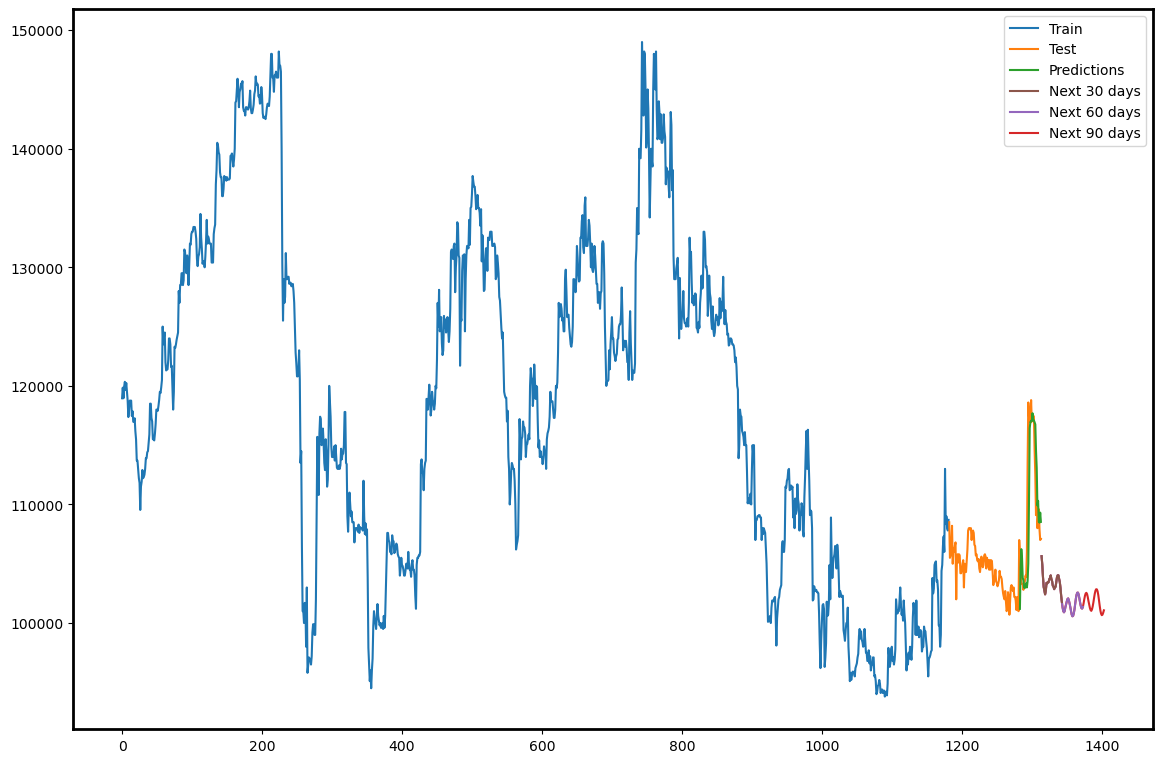

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_VJC_91.png")
plt.show()